In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
users_dt = pd.read_csv('https://query.data.world/s/35xvr7uy7a6hxxxspgxjbx5ftjvocn')

users_dt.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-7279641312655250028,user,Etats-Unis,en,3,8,0,0,0,0.0,...,mrs,False,False,False,True,709,3205,106.83,8.9,us
1,-1456013578740053406,user,Allemagne,de,3,8,0,0,0,0.0,...,mrs,False,False,False,True,709,3205,106.83,8.9,de
2,9006282053848196165,user,Suède,en,3,8,0,0,0,0.0,...,mr,True,False,True,True,689,3205,106.83,8.9,se
3,-7154634866120535654,user,Turquie,en,3,8,0,0,0,0.0,...,mrs,False,False,False,True,709,3205,106.83,8.9,tr
4,2858299215060733023,user,France,en,3,8,0,0,0,0.0,...,mr,True,False,True,True,709,3205,106.83,8.9,fr


In [4]:
users_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 24 columns):
identifierHash         98913 non-null int64
type                   98913 non-null object
country                98913 non-null object
language               98913 non-null object
socialNbFollowers      98913 non-null int64
socialNbFollows        98913 non-null int64
socialProductsLiked    98913 non-null int64
productsListed         98913 non-null int64
productsSold           98913 non-null int64
productsPassRate       98913 non-null float64
productsWished         98913 non-null int64
productsBought         98913 non-null int64
gender                 98913 non-null object
civilityGenderId       98913 non-null int64
civilityTitle          98913 non-null object
hasAnyApp              98913 non-null bool
hasAndroidApp          98913 non-null bool
hasIosApp              98913 non-null bool
hasProfilePicture      98913 non-null bool
daysSinceLastLogin     98913 non-null int64
seniorit

In [5]:
users_dt['type'].value_counts()

user    98913
Name: type, dtype: int64

In [6]:
# No missing data
missing_data = users_dt.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

identifierHash
False    98913
Name: identifierHash, dtype: int64

type
False    98913
Name: type, dtype: int64

country
False    98913
Name: country, dtype: int64

language
False    98913
Name: language, dtype: int64

socialNbFollowers
False    98913
Name: socialNbFollowers, dtype: int64

socialNbFollows
False    98913
Name: socialNbFollows, dtype: int64

socialProductsLiked
False    98913
Name: socialProductsLiked, dtype: int64

productsListed
False    98913
Name: productsListed, dtype: int64

productsSold
False    98913
Name: productsSold, dtype: int64

productsPassRate
False    98913
Name: productsPassRate, dtype: int64

productsWished
False    98913
Name: productsWished, dtype: int64

productsBought
False    98913
Name: productsBought, dtype: int64

gender
False    98913
Name: gender, dtype: int64

civilityGenderId
False    98913
Name: civilityGenderId, dtype: int64

civilityTitle
False    98913
Name: civilityTitle, dtype: int64

hasAnyApp
False    98913
Name: hasAnyApp, dtype: int

In [7]:
users_dt.drop(columns = ['identifierHash', 'type'], inplace = True)

In [8]:
# 96% is explained by 30 countries. 
countries = users_dt['country'].value_counts(normalize = True).to_frame()
filt = countries['country'] >= 0.001446
countries = countries.loc[filt]
countries['country'].sum()

0.9603692133491049

In [9]:
countries.loc[['France', 'Etats-Unis', 'Royaume-Uni', 'Italie', 'Allemagne', 
               'Espagne', 'Australie', 'Danemark', 'Suède', 'Belgique', 
              'Canada', 'Pays-Bas', 'Suisse', 'Hong Kong', 'Finlande'], ]['country'].sum()

0.9191713930423707

In [10]:
countries = countries.loc[['France', 'Etats-Unis', 'Royaume-Uni', 'Italie', 'Allemagne', 
               'Espagne', 'Australie', 'Danemark', 'Suède', 'Belgique', 
              'Canada', 'Pays-Bas', 'Suisse', 'Hong Kong', 'Finlande'], ]

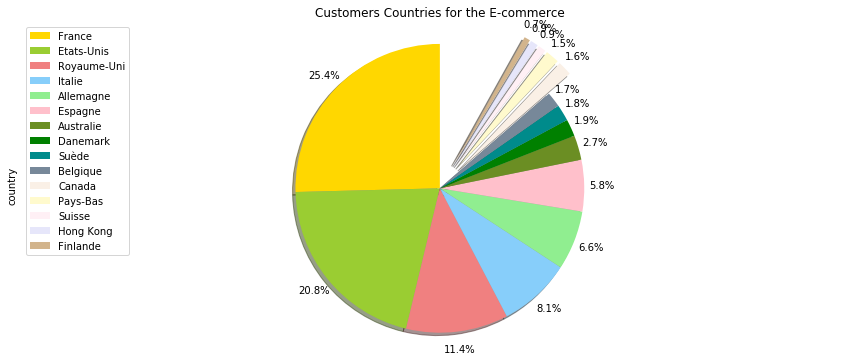

In [11]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 
               'pink', 'olivedrab', 'green', 'darkcyan', 'lightslategrey',
              'linen', 'lemonchiffon', 'lavenderblush', 'lavender', 'tan']

explode_list = [0, 0, 0, 0, 0, 
                0, 0, 0, 0, 0,
               0.2, 0.2, 0.2, 0.2, 0.2] # ratio for each continent with which to offset each wedge.

countries['country'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,
                            labels = None, 
                            pctdistance = 1.12, 
                            colors=colors_list, 
                            explode=explode_list
                            )

plt.title('Customers Countries for the E-commerce')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.axis('equal') 

# add legend
plt.legend(labels=countries.index, loc='upper left') 

In [12]:
# 6 counties makes majority of the data - 80%. I will leave only those data. 
countries.loc[['France', 'Etats-Unis', 'Royaume-Uni', 'Italie', 'Allemagne', 
               'Espagne', 'Australie', 'Danemark'], ]['country'].sum()

0.8284654191056787

In [13]:
filt = users_dt.country.isin(['France', 'Etats-Unis', 'Royaume-Uni', 'Italie', 'Allemagne', 'Espagne', 'Australie', 'Danemark'])
users_dt = users_dt.loc[filt]
users_dt.shape

(81946, 22)

In [14]:
dt1 = users_dt[['country', 'language', 'countryCode']]
dt1 = dt1.groupby(['country', 'language'], as_index = False).count()
dt1.rename(columns = {'countryCode': 'CountLanguage'}, inplace = True)

dt2 = users_dt[['country', 'language']]
dt2 = dt2.groupby(['country'], as_index = False).count()
dt2.rename(columns = {'language': 'CountCountries'}, inplace = True)
dt2

dt_m = pd.merge(dt1, dt2, how='inner', on='country')
dt_m.sort_values(['CountCountries', 'CountLanguage'], ascending=[True, False])
dt_m['Ratio'] = dt_m['CountLanguage'] / dt_m['CountCountries']
dt_m = dt_m[['country', 'language', 'Ratio']]

Text(0.5,1,'UK - Royaume-Uni')

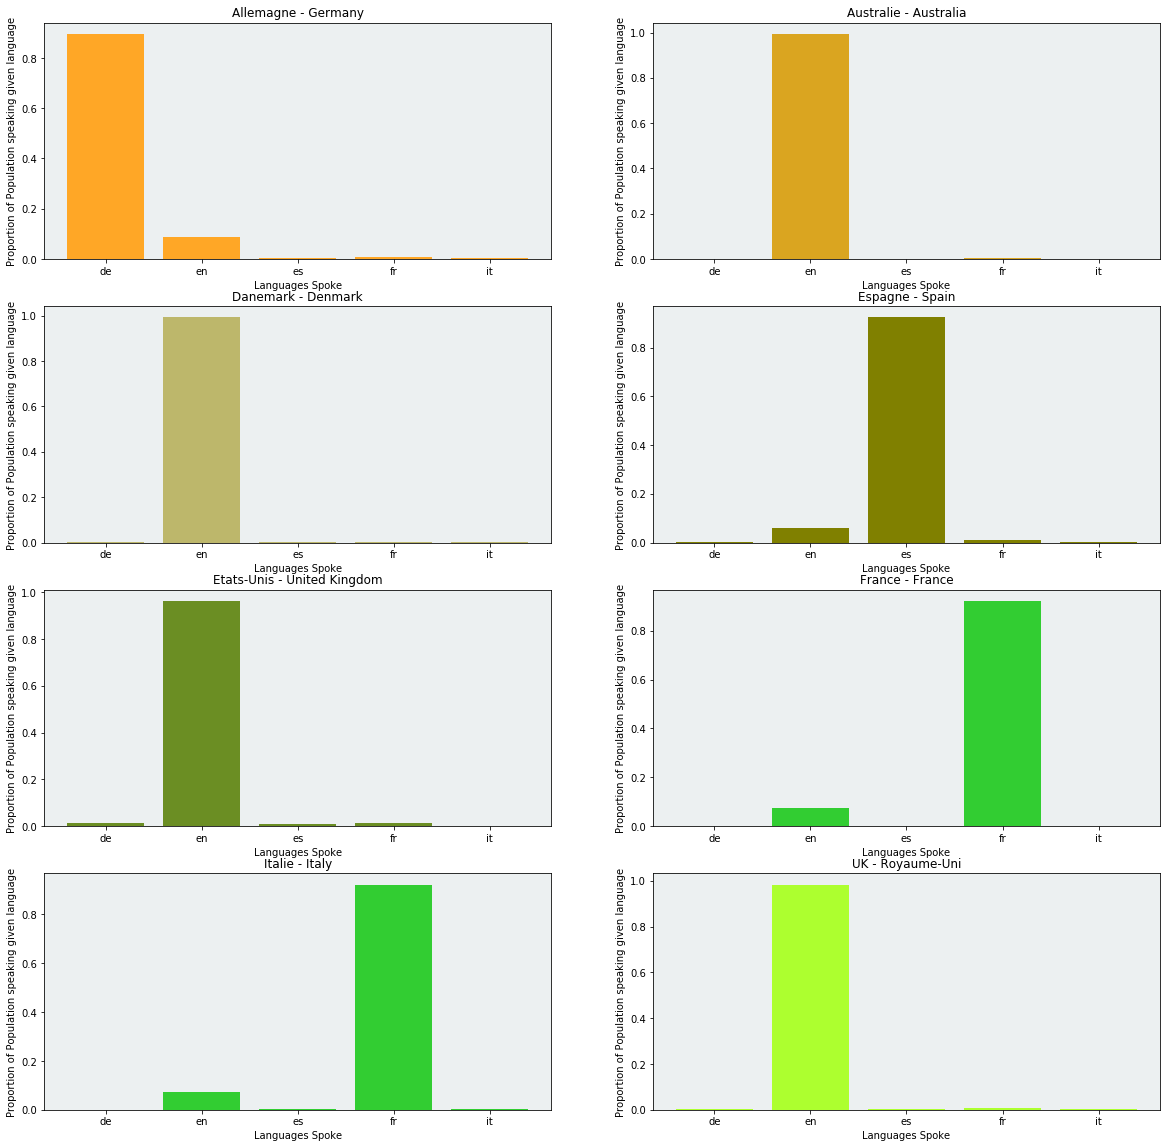

In [15]:
AL = dt_m.loc[dt_m.country.isin(['Allemagne'])]
AU = dt_m.loc[dt_m.country.isin(['Australie'])]
DE = dt_m.loc[dt_m.country.isin(['Danemark'])]
ES = dt_m.loc[dt_m.country.isin(['Espagne'])]
US = dt_m.loc[dt_m.country.isin(['Etats-Unis'])]
FR = dt_m.loc[dt_m.country.isin(['France'])]
IT = dt_m.loc[dt_m.country.isin(['Italie'])]
GB = dt_m.loc[dt_m.country.isin(['Royaume-Uni'])]

fig1 , ax1 = plt.subplots(nrows=4,ncols=2 , figsize = (20,20)) # Create a figure and subplo

ax1[0,0].bar(AL['language'],AL['Ratio'],color = '#FFA726') # set the color of the line chart
ax1[0, 0].set_facecolor("#ECF0F1") # Setting the background color by specifying the HEX Code
ax1[0, 0].set_xlabel('Languages Spoke')
ax1[0, 0].set_ylabel('Proportion of Population speaking given language')
ax1[0,0].set_title("Allemagne - Germany") # setting title of subplot

ax1[0, 1].bar(AU['language'], AU['Ratio'], color = 'goldenrod')
ax1[0, 1].set_facecolor("#ECF0F1") # Setting the background color by specifying the HEX Code
ax1[0, 1].set_xlabel('Languages Spoke')
ax1[0, 1].set_ylabel('Proportion of Population speaking given language')
ax1[0, 1].set_title("Australie - Australia") # setting title of subplot

ax1[1, 0].bar(DE['language'], DE['Ratio'], color = 'darkkhaki')
ax1[1, 0].set_facecolor("#ECF0F1") # Setting the background color by specifying the HEX Code
ax1[1, 0].set_xlabel('Languages Spoke')
ax1[1, 0].set_ylabel('Proportion of Population speaking given language')
ax1[1, 0].set_title("Danemark - Denmark") # setting title of subplot

ax1[1, 1].bar(ES['language'], ES['Ratio'], color = 'olive')
ax1[1, 1].set_facecolor("#ECF0F1") # Setting the background color by specifying the HEX Code
ax1[1, 1].set_xlabel('Languages Spoke')
ax1[1, 1].set_ylabel('Proportion of Population speaking given language')
ax1[1, 1].set_title("Espagne - Spain") # setting title of subplot

ax1[2, 0].bar(US['language'], US['Ratio'], color = 'olivedrab')
ax1[2, 0].set_facecolor("#ECF0F1") # Setting the background color by specifying the HEX Code
ax1[2, 0].set_xlabel('Languages Spoke')
ax1[2, 0].set_ylabel('Proportion of Population speaking given language')
ax1[2, 0].set_title("Etats-Unis - United Kingdom") # setting title of subplot

ax1[2, 1].bar(FR['language'], FR['Ratio'], color = 'limegreen')
ax1[2, 1].set_facecolor("#ECF0F1") # Setting the background color by specifying the HEX Code
ax1[2, 1].set_xlabel('Languages Spoke')
ax1[2, 1].set_ylabel('Proportion of Population speaking given language')
ax1[2, 1].set_title("France - France") # setting title of subplot

ax1[3, 0].bar(FR['language'], FR['Ratio'], color = 'limegreen')
ax1[3, 0].set_facecolor("#ECF0F1") # Setting the background color by specifying the HEX Code
ax1[3, 0].set_xlabel('Languages Spoke')
ax1[3, 0].set_ylabel('Proportion of Population speaking given language')
ax1[3, 0].set_title("Italie - Italy") # setting title of subplot

ax1[3, 1].bar(GB['language'], GB['Ratio'], color = 'greenyellow')
ax1[3, 1].set_facecolor("#ECF0F1") # Setting the background color by specifying the HEX Code
ax1[3, 1].set_xlabel('Languages Spoke')
ax1[3, 1].set_ylabel('Proportion of Population speaking given language')
ax1[3, 1].set_title("UK - Royaume-Uni") # setting title of subplot

In [16]:
users_dt.columns

Index(['country', 'language', 'socialNbFollowers', 'socialNbFollows',
       'socialProductsLiked', 'productsListed', 'productsSold',
       'productsPassRate', 'productsWished', 'productsBought', 'gender',
       'civilityGenderId', 'civilityTitle', 'hasAnyApp', 'hasAndroidApp',
       'hasIosApp', 'hasProfilePicture', 'daysSinceLastLogin', 'seniority',
       'seniorityAsMonths', 'seniorityAsYears', 'countryCode'],
      dtype='object')

In [42]:
# There are 2 observations with high number of socialNbFollowers and 4 with socialNbFollows

filt = users_dt['socialNbFollowers'] > 250
looker = users_dt[-filt]

filt1 = users_dt['socialNbFollows'] > 1000 
looker1 = users_dt[-filt1]

Text(0.5,1,'Social Number of Following')

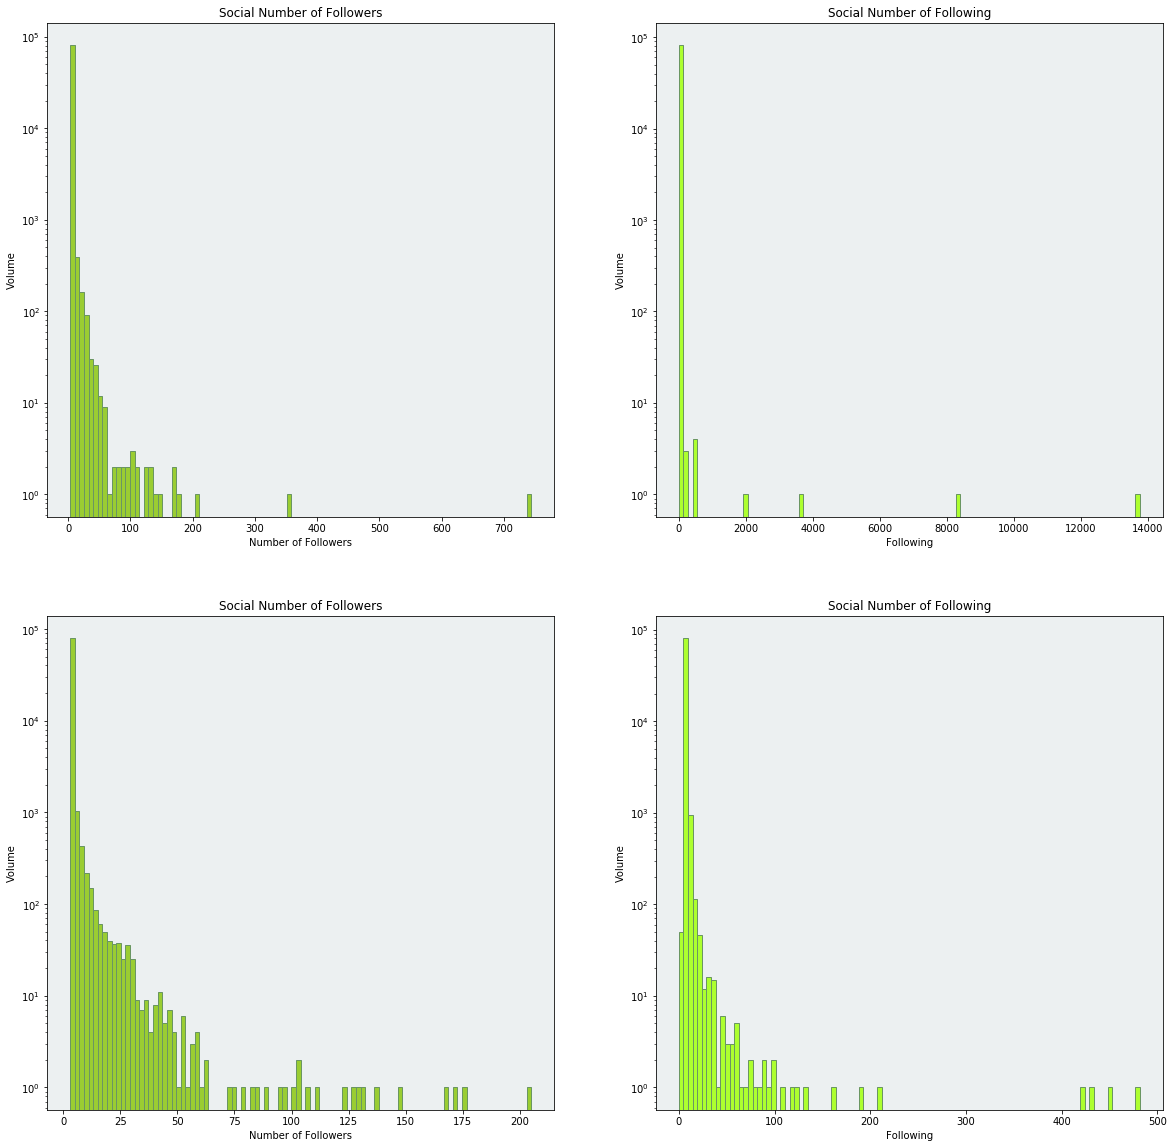

In [43]:
fig1 , ax2 = plt.subplots(nrows=2,ncols=2 , figsize = (20,20)) # Create a figure and subplo

ax2[0, 0].hist(users_dt['socialNbFollowers'], bins=100, color='yellowgreen' , edgecolor="#6A9662") # set the color of the line chart
ax2[0, 0].set_facecolor("#ECF0F1") # Setting the background color by specifying the HEX Code
ax2[0, 0].set_yscale('log')
ax2[0, 0].set_xlabel('Number of Followers')
ax2[0, 0].set_ylabel('Volume')
ax2[0,0].set_title("Social Number of Followers") # setting title of subplot

ax2[0, 1].hist(users_dt['socialNbFollows'], bins=100, color='greenyellow' , edgecolor="#6A9662") # set the color of the line chart
ax2[0, 1].set_facecolor("#ECF0F1") # Setting the background color by specifying the HEX Code
ax2[0, 1].set_yscale('log')
ax2[0, 1].set_xlabel('Following')
ax2[0, 1].set_ylabel('Volume')
ax2[0, 1].set_title("Social Number of Following")

# Let's have a look at the more than 250 followers and more than 1000 following

ax2[1, 0].hist(looker['socialNbFollowers'], bins=100, color='yellowgreen' , edgecolor="#6A9662") # set the color of the line chart
ax2[1, 0].set_facecolor("#ECF0F1") # Setting the background color by specifying the HEX Code
ax2[1, 0].set_yscale('log')
ax2[1, 0].set_xlabel('Number of Followers')
ax2[1, 0].set_ylabel('Volume')
ax2[1, 0].set_title("Social Number of Followers") # setting title of subplot

ax2[1, 1].hist(looker1['socialNbFollows'], bins=100, color='greenyellow' , edgecolor="#6A9662") # set the color of the line chart
ax2[1, 1].set_facecolor("#ECF0F1") # Setting the background color by specifying the HEX Code
ax2[1, 1].set_yscale('log')
ax2[1, 1].set_xlabel('Following')
ax2[1, 1].set_ylabel('Volume')
ax2[1, 1].set_title("Social Number of Following")

In [45]:
users_dt = users_dt[(-filt) & (-filt1)]

In [65]:
filt = users_dt['socialProductsLiked'] > 14000
users_dt = users_dt[-filt]

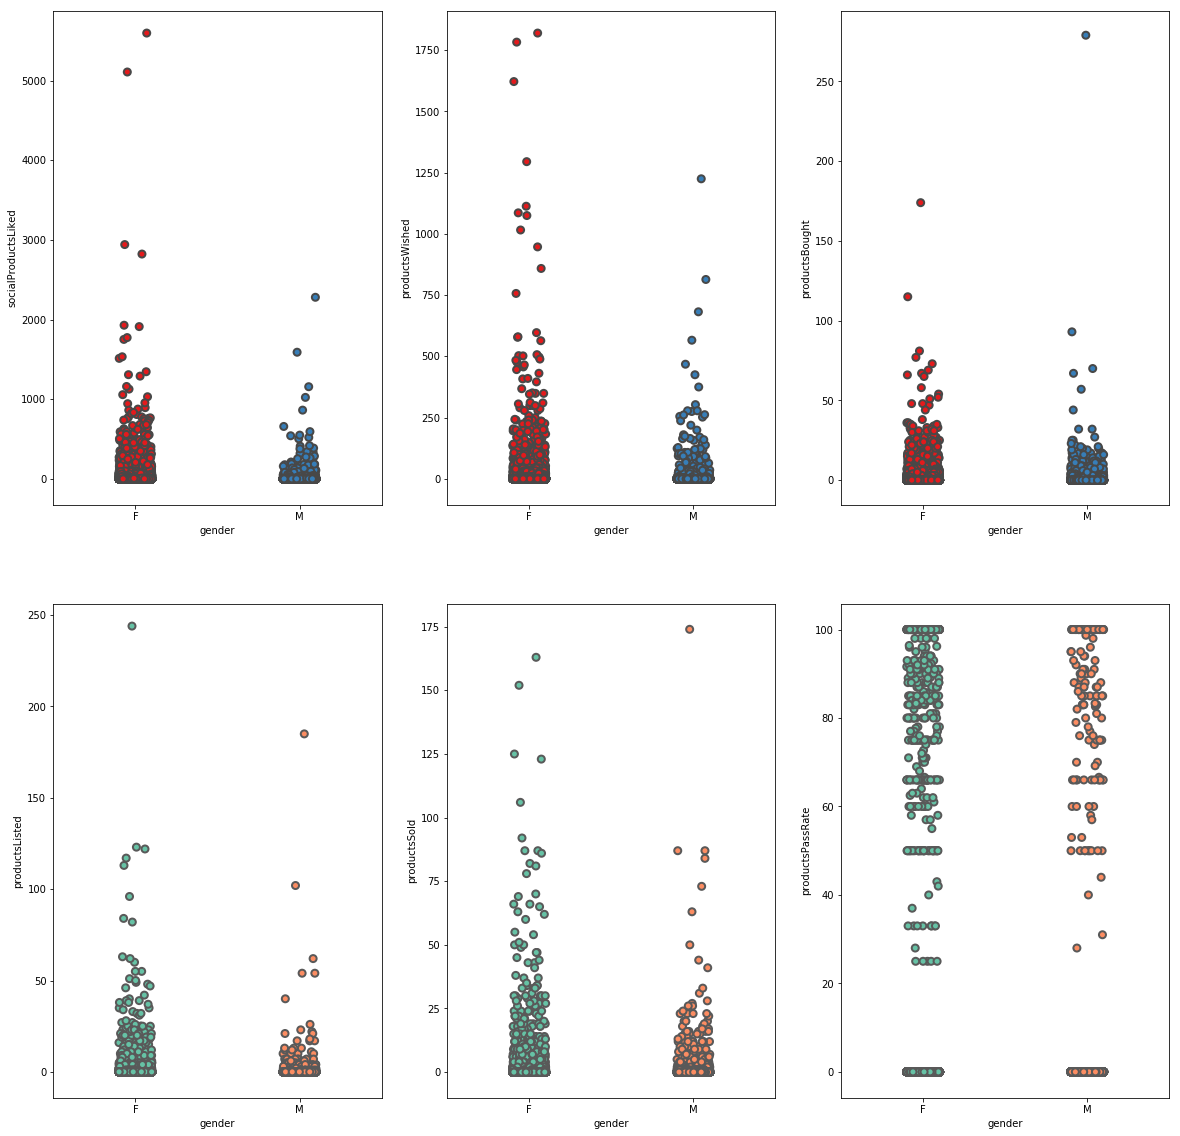

In [117]:
f, axes = plt.subplots(2, 3, figsize = (20,20))
sns.stripplot(x=users_dt.gender ,palette="Set1", y = users_dt.socialProductsLiked, linewidth=2, size = 7, ax=axes[0, 0])
sns.stripplot(x=users_dt.gender ,palette="Set1", y = users_dt.productsWished, linewidth=2, size = 7, ax=axes[0, 1])
sns.stripplot(x=users_dt.gender ,palette="Set1", y = users_dt.productsBought, linewidth=2, size = 7, ax=axes[0, 2])
sns.stripplot(x=users_dt.gender ,palette="Set2", y = users_dt.productsListed, linewidth=2, size = 7, ax=axes[1, 0])
sns.stripplot(x=users_dt.gender ,palette="Set2", y = users_dt.productsSold, linewidth=2, size = 7, ax=axes[1, 1])
sns.stripplot(x=users_dt.gender ,palette="Set2", y = users_dt.productsPassRate, linewidth=2, size = 7, ax=axes[1, 2])

plt.show()

In [122]:
# Do pivot table of gender to civilityGenderId
# You can remove civilityTitle, seniority, seniorityAsYears
# You can check if having profile picture increases numbers of products sold, number of followers, 
# If the seniority increases number of products bought / sold. 
# If the activity increases with the type of device: IoS / Android
# how often users use the app: daysSinceLastLogin
# Check folium and plotly
users_dt['seniorityAsMonths'].value_counts()

106.63    5340
106.60    5052
95.23     5006
95.20     4931
106.53    4709
106.57    4673
106.67    4586
106.70    4554
95.17     4437
106.83    4399
95.13     4345
106.50    4272
106.80    4142
95.27     4027
95.10     3971
106.77    3954
95.30     3789
106.73    3712
95.07     2042
Name: seniorityAsMonths, dtype: int64